In [103]:
%matplotlib inline
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
from pyuvwsim import (evaluate_baseline_uvw_ha_dec,
                      convert_enu_to_ecef)
from math import radians, degrees, pi, ceil

In [121]:
# Settings
lat = radians(34 + 4.0/60.0 + 43.497 / 3600.0)  # http://www.vla.nrao.edu/genpub/overview/
lon = -radians(107 + 37 / 60 + 3.819 / 3600.0)
alt = 2124  # m
dec = radians(-30.0)
ha_min = -0.0
ha_max = +0.0
dump_time = 10 # min
duration = ha_max - ha_min
num_times = 1 if duration == 0.0 else ((duration) * 60) // dump_time  # 1 sample every 10 min

In [122]:
# Load CASA VLA-C XYZ (ECEF) coordinates.
coords = np.loadtxt('../models/vla.c.cfg')
x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]

In [134]:
# Load iAntConfig horizon coordinates and convert to ecef
coords_enu = np.loadtxt('../models/vlaC.enu.27x3.txt')
e, n = coords_enu[:-1, 1], coords_enu[:-1, 2]
x1, y1, z1 = convert_enu_to_ecef(e, n, np.zeros_like(x), lon=radians(-90), lat=radians(30), alt=0.0)
#x1, y1, z1 = convert_enu_to_ecef(e, n, np.zeros_like(x), lon, lat, alt)

0 0.0


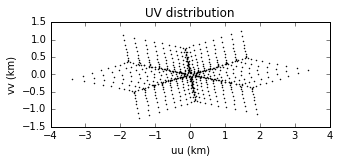

In [135]:
# Generate UV coordinates
uu, vv, ww = np.array([]), np.array([]), np.array([])
uu1, vv1, ww1 = np.array([]), np.array([]), np.array([])
for i, ha in enumerate(np.linspace((ha_min/24)*(2*pi), (ha_max/24)*(2*pi), num_times)):
    print(i, ha)
    uu_, vv_, ww_ = evaluate_baseline_uvw_ha_dec(x, y, z, ha - lon, dec)
    uu, vv, ww = np.append(uu, uu_), np.append(vv, vv_), np.append(ww, ww_)
    uu_, vv_, ww_ = evaluate_baseline_uvw_ha_dec(x1, y1, z1, ha - lon, dec)
    uu1, vv1, ww1 = np.append(uu1, uu_), np.append(vv1, vv_), np.append(ww1, ww_)
    
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect='equal')
ax.plot(uu / 1.0e3, vv / 1.0e3, '.', color='k', ms=2.0, alpha=1.0)
ax.plot(-uu / 1.0e3, -vv / 1.0e3, '.', color='k', ms=2.0, alpha=1.0)
ax.set_xlabel('uu (km)')
ax.set_ylabel('vv (km)')
ax.set_title('UV distribution')
plt.show()

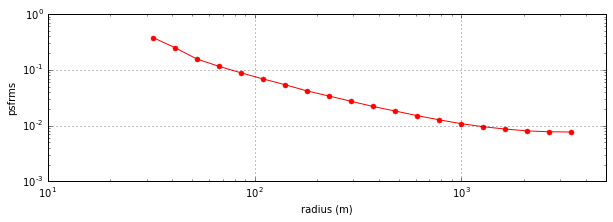

In [136]:
# Results from iAntConfig (http://public.ska.ac.za/software/iantconfig)
data = np.loadtxt('/Users/bmort/Desktop/ant_conf_metrics.txt.20x3.txt')
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(data[:, 1], data[:, 2], 'r.-', ms=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10, 5000)
ax.grid(True)
ax.set_xlabel('radius (m)')
ax.set_ylabel('psfrms')
plt.show()

In [137]:
# Grid the uv data
oversampling = 2.4
r2d = (uu**2 + vv**2)**0.5
r3d = (uu**2 + vv**2 + ww**2)**0.5
dish_d = 25.0
cell = dish_d / 2.4
uv_max = max(np.abs(uu).max(), np.abs(vv).max())
print('xy:%.5f r2d:%.5f r3d:%.5f' % (uv_max/1e3 - 3.37973, r2d.max()/1e3 - 3.37973, r3d.max()/1e3 - 3.37973))

r2d = (uu1**2 + vv1**2)**0.5
r3d = (uu1**2 + vv1**2 + ww1**2)**0.5
dish_d = 25.0
cell = dish_d / 2.4
uv_max = max(np.abs(uu1).max(), np.abs(vv1).max())
print('xy:%.5f r2d:%.5f r3d:%.5f' % (uv_max/1e3 - 3.37973, r2d.max()/1e3 - 3.37973, r3d.max()/1e3 - 3.37973))




xy:-0.00271 r2d:-0.00066 r3d:0.00774
xy:-0.20125 r2d:-0.17920 r3d:0.00784
